In [25]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import sklearn

In [2]:
%matplotlib inline

In [14]:
basepath = '../../Large Data/'
filename = "processedWithDates.pickle"
entireData = pd.read_pickle(basepath + filename)
                            #, parse_dates=True)
print entireData

             timeStart             timeEnd              ip         device  \
0  2013-12-03 00:01:22 2013-12-03 00:01:22   128.119.62.82        android   
1  2013-12-03 00:01:20 2013-12-03 00:01:20   128.119.62.82        android   
2  2013-12-03 00:02:24 2013-12-03 00:02:25   128.119.62.82        android   
3  2013-12-03 00:02:27 2013-12-03 00:02:27   128.119.62.82        android   
4  2013-12-03 00:03:31 2013-12-03 00:03:32   128.119.62.82        android   
5  2013-12-03 00:03:29 2013-12-03 00:03:29   128.119.62.82        android   
8  2013-12-03 00:06:44 2013-12-03 00:06:46   128.119.62.82        android   
9  2013-12-03 00:06:43 2013-12-03 00:07:10   128.119.62.82        android   
10 2013-12-03 00:07:48 2013-12-03 00:07:48   128.119.62.82        android   
11 2013-12-03 00:07:50 2013-12-03 00:07:50   128.119.62.82        android   
12 2013-12-03 00:08:05 2013-12-03 00:08:53   128.119.62.82         laptop   
13 2013-12-03 00:08:55 2013-12-03 00:08:55   128.119.62.82        android   

In [15]:
filteredData = entireData[entireData['device'] != "unknown"]

In [16]:
filteredData = filteredData[filteredData['device'] != "null"]

In [17]:
filteredData

timeStart             timeEnd              ip         device  \
0  2013-12-03 00:01:22 2013-12-03 00:01:22   128.119.62.82        android   
1  2013-12-03 00:01:20 2013-12-03 00:01:20   128.119.62.82        android   
2  2013-12-03 00:02:24 2013-12-03 00:02:25   128.119.62.82        android   
3  2013-12-03 00:02:27 2013-12-03 00:02:27   128.119.62.82        android   
4  2013-12-03 00:03:31 2013-12-03 00:03:32   128.119.62.82        android   
5  2013-12-03 00:03:29 2013-12-03 00:03:29   128.119.62.82        android   
8  2013-12-03 00:06:44 2013-12-03 00:06:46   128.119.62.82        android   
9  2013-12-03 00:06:43 2013-12-03 00:07:10   128.119.62.82        android   
10 2013-12-03 00:07:48 2013-12-03 00:07:48   128.119.62.82        android   
11 2013-12-03 00:07:50 2013-12-03 00:07:50   128.119.62.82        android   
12 2013-12-03 00:08:05 2013-12-03 00:08:53   128.119.62.82         laptop   
13 2013-12-03 00:08:55 2013-12-03 00:08:55   128.119.62.82        android   
14 2013-12-03 00:09:59 2013-12-03 00:10:00   128.119.62.82        android   
15 2013-12-03 00:09:57 2013-12-03 00:09:57   128.119.62.82        android   
16 2013-12-03 00:11:02 2013-12-03 00:11:02   128.119.62.82        android   
17 2013-12-03 00:11:04 2013-12-03 00:11:04   128.119.62.82        android   
18 2013-12-03 00:12:06 2013-12-03 00:12:07   128.119.62.82        android   
19 2013-12-03 00:12:09 2013-12-03 00:12:09   128.119.62.82        android   
20 2013-12-03 00:13:11 2013-12-03 00:13:15   128.119.62.82        android   
21 2013-12-03 00:13:13 2013-12-03 00:13:17   128.119.62.82        android   
22 2013-12-03 00:14:16 2013-12-03 00:14:16   128.119.62.82        android   
23 2013-12-03 00:14:18 2013-12-03 00:14:18   128.119.62.82        android   
24 2013-12-03 00:15:23 2013-12-03 00:15:23   128.119.62.82        android   
25 2013-12-03 00:15:20 2013-12-03 00:15:21   128.119.62.82        android   
26 2013-12-03 00:16:25 2013-12-03 00:16:26   128.119.62.82        android   
27 2013-12-03 00:16:28 2013-12-03 00:16:28   128.119.62.82        android   
28 2013-12-03 00:17:30 2013-12-03 00:17:30   128.119.62.82        android   
29 2013-12-03 00:17:32 2013-12-03 00:17:33   128.119.62.82        android   
30 2013-12-03 00:18:37 2013-12-03 00:18:37   128.119.62.82        android   
31 2013-12-03 00:19:42 2013-12-03 00:19:42   128.119.62.82        android   
..                 ...                 ...             ...            ...   
39 2014-02-20 23:40:38 2014-02-20 23:40:42    1.115.197.85  I-phone/I-pad   
0  2014-02-20 21:33:16 2014-02-20 21:33:18   68.194.41.107         laptop   
1  2014-02-20 21:33:18 2014-02-20 22:47:54   68.194.41.107         laptop   
2  2014-02-20 21:33:19 2014-02-20 22:33:24   68.194.41.107         laptop   
3  2014-02-20 21:33:19 2014-02-20 22:47:54   68.194.41.107         laptop   
4  2014-02-20 21:33:20 2014-02-20 22:36:14   68.194.41.107         laptop   
0  2014-02-20 20:55:01 2014-02-20 21:36:40   174.236.0.196  I-phone/I-pad   
1  2014-02-20 20:55:23 2014-02-20 21:56:53   174.236.0.196  I-phone/I-pad   
2  2014-02-20 21:37:52 2014-02-20 22:37:55   174.236.0.196         iPhone   
3  2014-02-20 22:13:59 2014-02-20 23:14:04   174.236.0.196  I-phone/I-pad   
0  2014-02-20 21:14:26 2014-02-20 21:30:03   71.192.246.87  I-phone/I-pad   
0  2014-02-20 21:48:49 2014-02-20 21:48:51  128.119.188.64  I-phone/I-pad   
1  2014-02-20 21:48:53 2014-02-20 21:49:00  128.119.188.64  I-phone/I-pad   
2  2014-02-20 21:48:55 2014-02-20 21:48:57  128.119.188.64           iPad   
3  2014-02-20 22:28:25 2014-02-20 23:33:44  128.119.188.64  I-phone/I-pad   
4  2014-02-20 23:40:38 2014-02-20 23:40:45  128.119.188.64  I-phone/I-pad   
0  2014-02-20 20:55:55 2014-02-20 21:56:09     24.34.140.7           iPad   
0  2014-02-20 07:07:49 2014-02-20 22:13:11  98.160.165.190         laptop   
0  2014-02-20 22:14:24 2014-02-20 22:14:32    24.34.194.63        android   
1  2014-02-20 22:14:24 2014-02-20 22:14:36    24.34.194.63        android   
2  2014-0

In [19]:
filteredData['device'].unique()

array(['android', 'laptop', 'I-phone/I-pad', 'iPhone', 'Microsoft', 'iPad',
       'Thunderbird', 'Mac', 'Unibox', 'iPod', 'BlackBerry'], dtype=object)

In [26]:
kmeans = sklearn.cluster.KMeans()

AttributeError: 'module' object has no attribute 'cluster'

In [131]:
filteredData = filteredData[filteredData['device'].isin([' android', ' laptop', ' I-phone/I-pad', ' iPhone', ' Microsoft',
       ' iPad', ' Thunderbird', ' Mac', ' Unibox', ' iPod', ' BlackBerry'])]

In [135]:
filteredData['device'] = filteredData['device'].map(str.strip)

/Users/shidan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [136]:
filteredData['device'].unique()

array(['android', 'laptop', 'I-phone/I-pad', 'iPhone', 'Microsoft', 'iPad',
       'Thunderbird', 'Mac', 'Unibox', 'iPod', 'BlackBerry'], dtype=object)

In [137]:
filteredData

timeStart    timeEnd               ip         device  \
0   00:01:22   00:01:22    128.119.62.82        android   
1   00:01:20   00:01:20    128.119.62.82        android   
2   00:02:24   00:02:25    128.119.62.82        android   
3   00:02:27   00:02:27    128.119.62.82        android   
4   00:03:31   00:03:32    128.119.62.82        android   
5   00:03:29   00:03:29    128.119.62.82        android   
8   00:06:44   00:06:46    128.119.62.82        android   
9   00:06:43   00:07:10    128.119.62.82        android   
10  00:07:48   00:07:48    128.119.62.82        android   
11  00:07:50   00:07:50    128.119.62.82        android   
12  00:08:05   00:08:53    128.119.62.82         laptop   
13  00:08:55   00:08:55    128.119.62.82        android   
14  00:09:59   00:10:00    128.119.62.82        android   
15  00:09:57   00:09:57    128.119.62.82        android   
16  00:11:02   00:11:02    128.119.62.82        android   
17  00:11:04   00:11:04    128.119.62.82        android   
18  00:12:06   00:12:07    128.119.62.82        android   
19  00:12:09   00:12:09    128.119.62.82        android   
20  00:13:11   00:13:15    128.119.62.82        android   
21  00:13:13   00:13:17    128.119.62.82        android   
22  00:14:16   00:14:16    128.119.62.82        android   
23  00:14:18   00:14:18    128.119.62.82        android   
24  00:15:23   00:15:23    128.119.62.82        android   
25  00:15:20   00:15:21    128.119.62.82        android   
26  00:16:25   00:16:26    128.119.62.82        android   
27  00:16:28   00:16:28    128.119.62.82        android   
28  00:17:30   00:17:30    128.119.62.82        android   
29  00:17:32   00:17:33    128.119.62.82        android   
30  00:18:37   00:18:37    128.119.62.82        android   
31  00:19:42   00:19:42    128.119.62.82        android   
..       ...        ...              ...            ...   
39  23:40:38   23:40:42     1.115.197.85  I-phone/I-pad   
0   21:33:16   21:33:18    68.194.41.107         laptop   
1   21:33:18   22:47:54    68.194.41.107         laptop   
2   21:33:19   22:33:24    68.194.41.107         laptop   
3   21:33:19   22:47:54    68.194.41.107         laptop   
4   21:33:20   22:36:14    68.194.41.107         laptop   
0   20:55:01   21:36:40    174.236.0.196  I-phone/I-pad   
1   20:55:23   21:56:53    174.236.0.196  I-phone/I-pad   
2   21:37:52   22:37:55    174.236.0.196         iPhone   
3   22:13:59   23:14:04    174.236.0.196  I-phone/I-pad   
0   21:14:26   21:30:03    71.192.246.87  I-phone/I-pad   
0   21:48:49   21:48:51   128.119.188.64  I-phone/I-pad   
1   21:48:53   21:49:00   128.119.188.64  I-phone/I-pad   
2   21:48:55   21:48:57   128.119.188.64           iPad   
3   22:28:25   23:33:44   128.119.188.64  I-phone/I-pad   
4   23:40:38   23:40:45   128.119.188.64  I-phone/I-pad   
0   20:55:55   21:56:09      24.34.140.7           iPad   
0   07:07:49   22:13:11   98.160.165.190         laptop   
0   22:14:24   22:14:32     24.34.194.63        android   
1   22:14:24   22:14:36     24.34.194.63        android   
2   22:14:32   22:14:32     24.34.194.63        android   
0   22:17:05   22:17:44    72.70.231.237  I-phone/I-pad   
1   22:17:47   22:17:50    72.70.231.237  I-phone/I-pad   
2   22:17:58   22:19:07    72.70.231.237  I-phone/I-pad   
0   22:22:05   22:22:08   71.192.247.121        android   
1   22:22:05   22:22:05   71.192.247.121        android   
2   22:22:05   22:22:06   71.192.247.121        android   
0   22:43:55   22:43:56    24.44.132.212         laptop   
0   23:19:06   23:31:41      76.23.245.8  I-phone/I-pad   
0   05:19:29   23:59:34    71.192.247.28         laptop   

                                                   id      date  weekday  
0     ed7b35c506182360f463e0dd99f51754cc7887c053e5...  20131203        1  
1     ed7b35c506182360f463e0dd99f51754cc7887c053e5...  20131203        1  
2     ed7b35c506182360f463e0dd99f51754cc7887c053e5...  20131203        1  
3     ed7b35c506182360f463e0dd99f51754cc7887

In [151]:
u1 = filteredData.ix[filteredData.timeStart.str.contains('(\d{2})[:](\d{2})[:](\d{2})')]

/Users/shidan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


In [152]:
u1 = u1.ix[u1.timeEnd.str.contains('(\d{2})[:](\d{2})[:](\d{2})')]

/Users/shidan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


In [153]:
u1

timeStart    timeEnd               ip         device  \
0   00:01:22   00:01:22    128.119.62.82        android   
1   00:01:20   00:01:20    128.119.62.82        android   
2   00:02:24   00:02:25    128.119.62.82        android   
3   00:02:27   00:02:27    128.119.62.82        android   
4   00:03:31   00:03:32    128.119.62.82        android   
5   00:03:29   00:03:29    128.119.62.82        android   
8   00:06:44   00:06:46    128.119.62.82        android   
9   00:06:43   00:07:10    128.119.62.82        android   
10  00:07:48   00:07:48    128.119.62.82        android   
11  00:07:50   00:07:50    128.119.62.82        android   
12  00:08:05   00:08:53    128.119.62.82         laptop   
13  00:08:55   00:08:55    128.119.62.82        android   
14  00:09:59   00:10:00    128.119.62.82        android   
15  00:09:57   00:09:57    128.119.62.82        android   
16  00:11:02   00:11:02    128.119.62.82        android   
17  00:11:04   00:11:04    128.119.62.82        android   
18  00:12:06   00:12:07    128.119.62.82        android   
19  00:12:09   00:12:09    128.119.62.82        android   
20  00:13:11   00:13:15    128.119.62.82        android   
21  00:13:13   00:13:17    128.119.62.82        android   
22  00:14:16   00:14:16    128.119.62.82        android   
23  00:14:18   00:14:18    128.119.62.82        android   
24  00:15:23   00:15:23    128.119.62.82        android   
25  00:15:20   00:15:21    128.119.62.82        android   
26  00:16:25   00:16:26    128.119.62.82        android   
27  00:16:28   00:16:28    128.119.62.82        android   
28  00:17:30   00:17:30    128.119.62.82        android   
29  00:17:32   00:17:33    128.119.62.82        android   
30  00:18:37   00:18:37    128.119.62.82        android   
31  00:19:42   00:19:42    128.119.62.82        android   
..       ...        ...              ...            ...   
39  23:40:38   23:40:42     1.115.197.85  I-phone/I-pad   
0   21:33:16   21:33:18    68.194.41.107         laptop   
1   21:33:18   22:47:54    68.194.41.107         laptop   
2   21:33:19   22:33:24    68.194.41.107         laptop   
3   21:33:19   22:47:54    68.194.41.107         laptop   
4   21:33:20   22:36:14    68.194.41.107         laptop   
0   20:55:01   21:36:40    174.236.0.196  I-phone/I-pad   
1   20:55:23   21:56:53    174.236.0.196  I-phone/I-pad   
2   21:37:52   22:37:55    174.236.0.196         iPhone   
3   22:13:59   23:14:04    174.236.0.196  I-phone/I-pad   
0   21:14:26   21:30:03    71.192.246.87  I-phone/I-pad   
0   21:48:49   21:48:51   128.119.188.64  I-phone/I-pad   
1   21:48:53   21:49:00   128.119.188.64  I-phone/I-pad   
2   21:48:55   21:48:57   128.119.188.64           iPad   
3   22:28:25   23:33:44   128.119.188.64  I-phone/I-pad   
4   23:40:38   23:40:45   128.119.188.64  I-phone/I-pad   
0   20:55:55   21:56:09      24.34.140.7           iPad   
0   07:07:49   22:13:11   98.160.165.190         laptop   
0   22:14:24   22:14:32     24.34.194.63        android   
1   22:14:24   22:14:36     24.34.194.63        android   
2   22:14:32   22:14:32     24.34.194.63        android   
0   22:17:05   22:17:44    72.70.231.237  I-phone/I-pad   
1   22:17:47   22:17:50    72.70.231.237  I-phone/I-pad   
2   22:17:58   22:19:07    72.70.231.237  I-phone/I-pad   
0   22:22:05   22:22:08   71.192.247.121        android   
1   22:22:05   22:22:05   71.192.247.121        android   
2   22:22:05   22:22:06   71.192.247.121        android   
0   22:43:55   22:43:56    24.44.132.212         laptop   
0   23:19:06   23:31:41      76.23.245.8  I-phone/I-pad   
0   05:19:29   23:59:34    71.192.247.28         laptop   

                                                   id      date  weekday  
0     ed7b35c506182360f463e0dd99f51754cc7887c053e5...  20131203        1  
1     ed7b35c506182360f463e0dd99f51754cc7887c053e5...  20131203        1  
2     ed7b35c506182360f463e0dd99f51754cc7887c053e5...  20131203        1  
3     ed7b35c506182360f463e0dd99f51754cc7887

In [154]:
# u1 = filteredData.ix[filteredData.timeStart.str.len() ==8]
# u1 = u1.ix[u1.timeEnd.str.len()==9]
u1['timeStart'] = pd.to_datetime(u1['date'] + u1['timeStart'], format='%Y%m%d%H:%M:%S')
u1['timeEnd'] = pd.to_datetime(u1['date'] + u1['timeEnd'], format='%Y%m%d %H:%M:%S')

In [155]:
u1

timeStart             timeEnd               ip         device  \
0  2013-12-03 00:01:22 2013-12-03 00:01:22    128.119.62.82        android   
1  2013-12-03 00:01:20 2013-12-03 00:01:20    128.119.62.82        android   
2  2013-12-03 00:02:24 2013-12-03 00:02:25    128.119.62.82        android   
3  2013-12-03 00:02:27 2013-12-03 00:02:27    128.119.62.82        android   
4  2013-12-03 00:03:31 2013-12-03 00:03:32    128.119.62.82        android   
5  2013-12-03 00:03:29 2013-12-03 00:03:29    128.119.62.82        android   
8  2013-12-03 00:06:44 2013-12-03 00:06:46    128.119.62.82        android   
9  2013-12-03 00:06:43 2013-12-03 00:07:10    128.119.62.82        android   
10 2013-12-03 00:07:48 2013-12-03 00:07:48    128.119.62.82        android   
11 2013-12-03 00:07:50 2013-12-03 00:07:50    128.119.62.82        android   
12 2013-12-03 00:08:05 2013-12-03 00:08:53    128.119.62.82         laptop   
13 2013-12-03 00:08:55 2013-12-03 00:08:55    128.119.62.82        android   
14 2013-12-03 00:09:59 2013-12-03 00:10:00    128.119.62.82        android   
15 2013-12-03 00:09:57 2013-12-03 00:09:57    128.119.62.82        android   
16 2013-12-03 00:11:02 2013-12-03 00:11:02    128.119.62.82        android   
17 2013-12-03 00:11:04 2013-12-03 00:11:04    128.119.62.82        android   
18 2013-12-03 00:12:06 2013-12-03 00:12:07    128.119.62.82        android   
19 2013-12-03 00:12:09 2013-12-03 00:12:09    128.119.62.82        android   
20 2013-12-03 00:13:11 2013-12-03 00:13:15    128.119.62.82        android   
21 2013-12-03 00:13:13 2013-12-03 00:13:17    128.119.62.82        android   
22 2013-12-03 00:14:16 2013-12-03 00:14:16    128.119.62.82        android   
23 2013-12-03 00:14:18 2013-12-03 00:14:18    128.119.62.82        android   
24 2013-12-03 00:15:23 2013-12-03 00:15:23    128.119.62.82        android   
25 2013-12-03 00:15:20 2013-12-03 00:15:21    128.119.62.82        android   
26 2013-12-03 00:16:25 2013-12-03 00:16:26    128.119.62.82        android   
27 2013-12-03 00:16:28 2013-12-03 00:16:28    128.119.62.82        android   
28 2013-12-03 00:17:30 2013-12-03 00:17:30    128.119.62.82        android   
29 2013-12-03 00:17:32 2013-12-03 00:17:33    128.119.62.82        android   
30 2013-12-03 00:18:37 2013-12-03 00:18:37    128.119.62.82        android   
31 2013-12-03 00:19:42 2013-12-03 00:19:42    128.119.62.82        android   
..                 ...                 ...              ...            ...   
39 2014-02-20 23:40:38 2014-02-20 23:40:42     1.115.197.85  I-phone/I-pad   
0  2014-02-20 21:33:16 2014-02-20 21:33:18    68.194.41.107         laptop   
1  2014-02-20 21:33:18 2014-02-20 22:47:54    68.194.41.107         laptop   
2  2014-02-20 21:33:19 2014-02-20 22:33:24    68.194.41.107         laptop   
3  2014-02-20 21:33:19 2014-02-20 22:47:54    68.194.41.107         laptop   
4  2014-02-20 21:33:20 2014-02-20 22:36:14    68.194.41.107         laptop   
0  2014-02-20 20:55:01 2014-02-20 21:36:40    174.236.0.196  I-phone/I-pad   
1  2014-02-20 20:55:23 2014-02-20 21:56:53    174.236.0.196  I-phone/I-pad   
2  2014-02-20 21:37:52 2014-02-20 22:37:55    174.236.0.196         iPhone   
3  2014-02-20 22:13:59 2014-02-20 23:14:04    174.236.0.196  I-phone/I-pad   
0  2014-02-20 21:14:26 2014-02-20 21:30:03    71.192.246.87  I-phone/I-pad   
0  2014-02-20 21:48:49 2014-02-20 21:48:51   128.119.188.64  I-phone/I-pad   
1  2014-02-20 21:48:53 2014-02-20 21:49:00   128.119.188.64  I-phone/I-pad   
2  2014-02-20 21:48:55 2014-02-20 21:48:57   128.119.188.64           iPad   
3  2014-02-20 22:28:25 2014-02-20 23:33:44   128.119.188.64  I-phone/I-pad   
4  2014-02-20 23:40:38 2014-02-20 23:40:45   128.119.188.64  I-phone/I-pad   
0  2014-02-20 20:55:55 2014-02-20 21:56:09      24.34.140.7           iPad   
0  2014-02-20 07:07:49 2014-02-20 22:13:11   98.160.165.190         laptop   
0  2014-02-20 22:14:24 2014-02-20 22:14:32     24.34.194.63        android   
1  2014-02-20 22:14:24 2014-02-20 2

In [156]:
u1.to_pickle("processedWithDates.pickle")

In [159]:
u1['duration'] =  (u1.timeEnd-u1.timeStart).astype('timedelta64[s]')

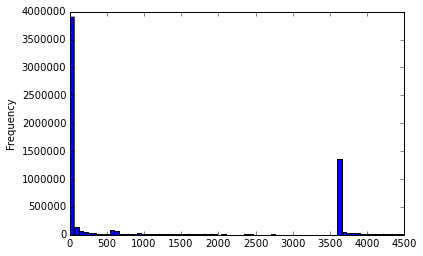

In [163]:
u1["duration"][(u1["duration"] > 0) & (u1["duration"] < 4500)].plot(kind = 'hist', bins =75)


In [164]:
grouped = u1.groupby('device')

In [169]:
droid = grouped.get_group('I-phone/I-pad')

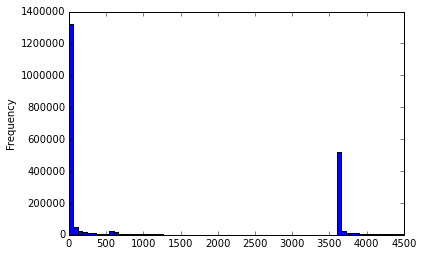

In [170]:
droid["duration"][(droid["duration"] > 0) & (droid["duration"] < 4500)].plot(kind = 'hist', bins =75)


In [45]:
groupByID = filteredData.groupby('id')

In [51]:
groupByID.groups

{'  ee056e11fd0abde11d4df102adb7b994f7dc6ed5b16035a766beba16': [0,
  0,
  0,
  1,
  2,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0],
 '  b4d6b222974ec40c52e30096cc313b4a95c486e06b225456f96985e2': [36,
  13,
  15,
  16,
  479,
  480,
  481,
  482,
  483,
  484,
  485,
  486,
  487,
  488,
  489,
  490,
  14,
  44,
  8,
  384,
  27122,
  22,
  23,
  24,
  232,
  233,
  234,
  601,
  615,
  633,
  634,
  76,
  13,
  42,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  407,
  408,
  409,
  11,
  15,
  16,
  28,
  29,
  30,
  31,
  32,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  187,
  28,
  40,
  0,
  405,
  406,
  590,
  591,
  592,
  31,
  42,
  43,
  44,
  45,
  46,
  97,
  98,
  99,
  101,
  111,
  197,
  198,
  199,
  200,
  201,
  202,
  203,
  204,
  205,
  206,
  65,
  11,
  23,
  7,
  33,
  292,
  293,
  743,
  744,
  6,
  0,
  1,
  11,
  12,
  13,
  14,
  15,
  16,
  394,
  395,
  396,
  397,
  398,
  399,
  400,
  401,
  402,
  

In [109]:
u1 = groupByID.get_group('  b4d6b222974ec40c52e30096cc313b4a95c486e06b225456f96985e2')

In [110]:
u1

timeStart    timeEnd                ip          device  \
36     11:23:28   11:24:12    128.119.131.84   I-phone/I-pad   
13     09:00:41   09:00:55   198.228.205.154   I-phone/I-pad   
15     09:00:51   09:00:53   198.228.205.154          iPhone   
16     09:00:53   10:01:13   198.228.205.154   I-phone/I-pad   
479    17:11:51   18:21:50   198.228.206.127   I-phone/I-pad   
480    17:11:57   17:12:00   198.228.206.127   I-phone/I-pad   
481    17:12:00   17:12:03   198.228.206.127   I-phone/I-pad   
482    17:12:04   17:12:06   198.228.206.127   I-phone/I-pad   
483    17:15:08   18:19:46   198.228.206.127   I-phone/I-pad   
484    17:15:11   17:15:13   198.228.206.127   I-phone/I-pad   
485    17:17:31   17:17:33   198.228.206.127          iPhone   
486    17:19:47   17:19:48   198.228.206.127   I-phone/I-pad   
487    17:19:56   17:19:59   198.228.206.127   I-phone/I-pad   
488    17:21:44   18:21:47   198.228.206.127          iPhone   
489    17:54:59   18:55:07   198.228.206.127   I-phone/I-pad   
490    17:55:03   17:55:05   198.228.206.127   I-phone/I-pad   
14     11:24:43   11:25:12    128.119.131.84   I-phone/I-pad   
44     09:54:29   09:55:10    128.119.131.84          iPhone   
8      11:00:58   11:01:07    128.119.131.84          iPhone   
384    14:12:57   14:13:44    128.119.131.84   I-phone/I-pad   
27122  18:11:09   18:11:33   198.228.196.124   I-phone/I-pad   
22     08:39:10   09:42:12   198.228.196.124          iPhone   
23     08:39:15   08:39:17   198.228.196.124   I-phone/I-pad   
24     08:40:29   09:40:32   198.228.196.124          iPhone   
232    13:20:45   14:24:11   198.228.196.124          iPhone   
233    13:20:56   13:20:58   198.228.196.124          iPhone   
234    13:22:57   13:22:59   198.228.196.124          iPhone   
601    18:11:27   19:13:19   198.228.196.124   I-phone/I-pad   
615    15:43:28   15:43:30   198.228.196.124          iPhone   
633    17:41:46   18:41:57   198.228.196.124          iPhone   
...         ...        ...               ...             ...   
85     08:58:00   09:59:48    128.119.131.84          iPhone   
130    09:21:25   10:21:51    198.228.197.91   I-phone/I-pad   
131    09:21:30   09:21:32    198.228.197.91          iPhone   
213    10:15:31   10:15:56    198.228.197.91   I-phone/I-pad   
215    10:15:40   10:15:47    198.228.197.91   I-phone/I-pad   
323    11:12:36   11:12:39    198.228.197.91   I-phone/I-pad   
351    11:52:48   11:52:57    198.228.197.91   I-phone/I-pad   
352    11:52:54   11:52:56    198.228.197.91   I-phone/I-pad   
353    12:05:37   12:05:40    198.228.197.91          iPhone   
354    12:49:42   12:50:53    198.228.197.91   I-phone/I-pad   
355    12:51:01   12:52:12    198.228.197.91          iPhone   
356    12:54:29   12:54:34    198.228.197.91   I-phone/I-pad   
357    13:47:15   13:47:24    198.228.197.91          iPhone   
358    13:47:22   13:47:23    198.228.197.91          iPhone   
435    14:45:00   14:45:02    198.228.197.91   I-phone/I-pad   
551    15:44:50   15:44:52    198.228.197.91   I-phone/I-pad   
672    17:09:46   18:09:54    198.228.197.91          iPhone   
673    17:25:25   18:25:28    198.228.197.91   I-phone/I-pad   
674    17:48:03   18:48:11    198.228.197.91   I-phone/I-pad   
675    17:48:08   17:48:10    198.228.197.91          iPhone   
676    18:39:13   19:40:28    198.228.197.91   I-phone/I-pad   
677    18:39:18   18:39:20    198.228.197.91          iPhone   
678    19:31:23   20:31:31    198.228.197.91   I-phone/I-pad   
679    19:31:28   19:31:30    198.228.197.91   I-phone/I-pad   
680    20:28:29   21:28:37    198.228.197.91   I-phone/I-pad   
681    20:28:34   20:28:36    198.228.197.91          iPhone   
682    21:25:35   22:25:44    198.228.197.91          iPhone   
683    21:25:40   21:25:42    198.228.197.91   I-phone/I-pad   
684    22:03:57   23:04:04    198.228.197.91   I-phone/I-pad   
46     09:08:46   10:00:48    128.119.131.84   I-phone/I-pad   

                                     

In [121]:
u1 = filteredData

In [ ]:
u1['']

In [122]:
u1['timeStart'] = pd.to_datetime(u1['date'] + u1['timeStart'], format='%Y%m%d%H:%M:%S')
u1['timeEnd'] = pd.to_datetime(u1['date'] + u1['timeEnd'], format='%Y%m%d %H:%M:%S')

ValueError: time data '20131203accepted' does not match format '%Y%m%d%H:%M:%S' (match)

In [112]:
u1.dropna()

timeStart    timeEnd                ip          device  \
36    2013-12-03 11:23:28   11:24:12    128.119.131.84   I-phone/I-pad   
13    2013-12-03 09:00:41   09:00:55   198.228.205.154   I-phone/I-pad   
15    2013-12-03 09:00:51   09:00:53   198.228.205.154          iPhone   
16    2013-12-03 09:00:53   10:01:13   198.228.205.154   I-phone/I-pad   
479   2013-12-03 17:11:51   18:21:50   198.228.206.127   I-phone/I-pad   
480   2013-12-03 17:11:57   17:12:00   198.228.206.127   I-phone/I-pad   
481   2013-12-03 17:12:00   17:12:03   198.228.206.127   I-phone/I-pad   
482   2013-12-03 17:12:04   17:12:06   198.228.206.127   I-phone/I-pad   
483   2013-12-03 17:15:08   18:19:46   198.228.206.127   I-phone/I-pad   
484   2013-12-03 17:15:11   17:15:13   198.228.206.127   I-phone/I-pad   
485   2013-12-03 17:17:31   17:17:33   198.228.206.127          iPhone   
486   2013-12-03 17:19:47   17:19:48   198.228.206.127   I-phone/I-pad   
487   2013-12-03 17:19:56   17:19:59   198.228.206.127   I-phone/I-pad   
488   2013-12-03 17:21:44   18:21:47   198.228.206.127          iPhone   
489   2013-12-03 17:54:59   18:55:07   198.228.206.127   I-phone/I-pad   
490   2013-12-03 17:55:03   17:55:05   198.228.206.127   I-phone/I-pad   
14    2013-12-03 11:24:43   11:25:12    128.119.131.84   I-phone/I-pad   
44    2013-12-04 09:54:29   09:55:10    128.119.131.84          iPhone   
8     2013-12-04 11:00:58   11:01:07    128.119.131.84          iPhone   
384   2013-12-04 14:12:57   14:13:44    128.119.131.84   I-phone/I-pad   
27122 2013-12-05 18:11:09   18:11:33   198.228.196.124   I-phone/I-pad   
22    2013-12-05 08:39:10   09:42:12   198.228.196.124          iPhone   
23    2013-12-05 08:39:15   08:39:17   198.228.196.124   I-phone/I-pad   
24    2013-12-05 08:40:29   09:40:32   198.228.196.124          iPhone   
232   2013-12-05 13:20:45   14:24:11   198.228.196.124          iPhone   
233   2013-12-05 13:20:56   13:20:58   198.228.196.124          iPhone   
234   2013-12-05 13:22:57   13:22:59   198.228.196.124          iPhone   
601   2013-12-05 18:11:27   19:13:19   198.228.196.124   I-phone/I-pad   
615   2013-12-06 15:43:28   15:43:30   198.228.196.124          iPhone   
633   2013-12-06 17:41:46   18:41:57   198.228.196.124          iPhone   
...                   ...        ...               ...             ...   
85    2014-02-20 08:58:00   09:59:48    128.119.131.84          iPhone   
130   2014-02-20 09:21:25   10:21:51    198.228.197.91   I-phone/I-pad   
131   2014-02-20 09:21:30   09:21:32    198.228.197.91          iPhone   
213   2014-02-20 10:15:31   10:15:56    198.228.197.91   I-phone/I-pad   
215   2014-02-20 10:15:40   10:15:47    198.228.197.91   I-phone/I-pad   
323   2014-02-20 11:12:36   11:12:39    198.228.197.91   I-phone/I-pad   
351   2014-02-20 11:52:48   11:52:57    198.228.197.91   I-phone/I-pad   
352   2014-02-20 11:52:54   11:52:56    198.228.197.91   I-phone/I-pad   
353   2014-02-20 12:05:37   12:05:40    198.228.197.91          iPhone   
354   2014-02-20 12:49:42   12:50:53    198.228.197.91   I-phone/I-pad   
355   2014-02-20 12:51:01   12:52:12    198.228.197.91          iPhone   
356   2014-02-20 12:54:29   12:54:34    198.228.197.91   I-phone/I-pad   
357   2014-02-20 13:47:15   13:47:24    198.228.197.91          iPhone   
358   2014-02-20 13:47:22   13:47:23    198.228.197.91          iPhone   
435   2014-02-20 14:45:00   14:45:02    198.228.197.91   I-phone/I-pad   
551   2014-02-20 15:44:50   15:44:52    198.228.197.91   I-phone/I-pad   
672   2014-02-20 17:09:46   18:09:54    198.228.197.91          iPhone   
673   2014-02-20 17:25:25   18:25:28    198.228.197.91   I-phone/I-pad   
674   2014-02-20 17:48:03   18:48:11    198.228.197.91   I-phone/I-pad   
675   2014-02-20 17:48:08   17:48:10    198.228.197.91          iPhone   
676   2014-02-20 18:39:13   19:40:28    198.228.197.91   I-phone/I-pad   
677   2014-02-20 18:39:18   18:39:20    198.228.197.91          iPhone   
678   2014-02-20 19:

/Users/shidan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [114]:
u1

timeStart             timeEnd                ip  \
36    2013-12-03 11:23:28 2013-12-03 11:24:12    128.119.131.84   
13    2013-12-03 09:00:41 2013-12-03 09:00:55   198.228.205.154   
15    2013-12-03 09:00:51 2013-12-03 09:00:53   198.228.205.154   
16    2013-12-03 09:00:53 2013-12-03 10:01:13   198.228.205.154   
479   2013-12-03 17:11:51 2013-12-03 18:21:50   198.228.206.127   
480   2013-12-03 17:11:57 2013-12-03 17:12:00   198.228.206.127   
481   2013-12-03 17:12:00 2013-12-03 17:12:03   198.228.206.127   
482   2013-12-03 17:12:04 2013-12-03 17:12:06   198.228.206.127   
483   2013-12-03 17:15:08 2013-12-03 18:19:46   198.228.206.127   
484   2013-12-03 17:15:11 2013-12-03 17:15:13   198.228.206.127   
485   2013-12-03 17:17:31 2013-12-03 17:17:33   198.228.206.127   
486   2013-12-03 17:19:47 2013-12-03 17:19:48   198.228.206.127   
487   2013-12-03 17:19:56 2013-12-03 17:19:59   198.228.206.127   
488   2013-12-03 17:21:44 2013-12-03 18:21:47   198.228.206.127   
489   2013-12-03 17:54:59 2013-12-03 18:55:07   198.228.206.127   
490   2013-12-03 17:55:03 2013-12-03 17:55:05   198.228.206.127   
14    2013-12-03 11:24:43 2013-12-03 11:25:12    128.119.131.84   
44    2013-12-04 09:54:29 2013-12-04 09:55:10    128.119.131.84   
8     2013-12-04 11:00:58 2013-12-04 11:01:07    128.119.131.84   
384   2013-12-04 14:12:57 2013-12-04 14:13:44    128.119.131.84   
27122 2013-12-05 18:11:09 2013-12-05 18:11:33   198.228.196.124   
22    2013-12-05 08:39:10 2013-12-05 09:42:12   198.228.196.124   
23    2013-12-05 08:39:15 2013-12-05 08:39:17   198.228.196.124   
24    2013-12-05 08:40:29 2013-12-05 09:40:32   198.228.196.124   
232   2013-12-05 13:20:45 2013-12-05 14:24:11   198.228.196.124   
233   2013-12-05 13:20:56 2013-12-05 13:20:58   198.228.196.124   
234   2013-12-05 13:22:57 2013-12-05 13:22:59   198.228.196.124   
601   2013-12-05 18:11:27 2013-12-05 19:13:19   198.228.196.124   
615   2013-12-06 15:43:28 2013-12-06 15:43:30   198.228.196.124   
633   2013-12-06 17:41:46 2013-12-06 18:41:57   198.228.196.124   
...                   ...                 ...               ...   
85    2014-02-20 08:58:00 2014-02-20 09:59:48    128.119.131.84   
130   2014-02-20 09:21:25 2014-02-20 10:21:51    198.228.197.91   
131   2014-02-20 09:21:30 2014-02-20 09:21:32    198.228.197.91   
213   2014-02-20 10:15:31 2014-02-20 10:15:56    198.228.197.91   
215   2014-02-20 10:15:40 2014-02-20 10:15:47    198.228.197.91   
323   2014-02-20 11:12:36 2014-02-20 11:12:39    198.228.197.91   
351   2014-02-20 11:52:48 2014-02-20 11:52:57    198.228.197.91   
352   2014-02-20 11:52:54 2014-02-20 11:52:56    198.228.197.91   
353   2014-02-20 12:05:37 2014-02-20 12:05:40    198.228.197.91   
354   2014-02-20 12:49:42 2014-02-20 12:50:53    198.228.197.91   
355   2014-02-20 12:51:01 2014-02-20 12:52:12    198.228.197.91   
356   2014-02-20 12:54:29 2014-02-20 12:54:34    198.228.197.91   
357   2014-02-20 13:47:15 2014-02-20 13:47:24    198.228.197.91   
358   2014-02-20 13:47:22 2014-02-20 13:47:23    198.228.197.91   
435   2014-02-20 14:45:00 2014-02-20 14:45:02    198.228.197.91   
551   2014-02-20 15:44:50 2014-02-20 15:44:52    198.228.197.91   
672   2014-02-20 17:09:46 2014-02-20 18:09:54    198.228.197.91   
673   2014-02-20 17:25:25 2014-02-20 18:25:28    198.228.197.91   
674   2014-02-20 17:48:03 2014-02-20 18:48:11    198.228.197.91   
675   2014-02-20 17:48:08 2014-02-20 17:48:10    198.228.197.91   
676   2014-02-20 18:39:13 2014-02-20 19:40:28    198.228.197.91   
677   2014-02-20 18:39:18 2014-02-20 18:39:20    198.228.197.91   
678   2014-02-20 19:31:23 2014-02-20 20:31:31    198.228.197.91   
679   2014-02-20 19:31:28 2014-02-20 19:31:30    198.228.197.91   
680   2014-02-20 20:28:29 2014-02-20 21:28:37    198.228.197.91   
681   2014-02-20 20:28:34 2014-02-20 20:28:36    198.228.197.91   
682   2014-02-20 21:25:35 2014-02-20 22:25:44    198.228.197.91   
683   2014-02-20 21:25:40 2014-02-20 21:25:42    198.228.197.91

In [115]:
u1['duration'] = (u1.timeEnd-u1.timeStart).astype('timedelta64[s]')

/Users/shidan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [116]:
u1

timeStart             timeEnd                ip  \
36    2013-12-03 11:23:28 2013-12-03 11:24:12    128.119.131.84   
13    2013-12-03 09:00:41 2013-12-03 09:00:55   198.228.205.154   
15    2013-12-03 09:00:51 2013-12-03 09:00:53   198.228.205.154   
16    2013-12-03 09:00:53 2013-12-03 10:01:13   198.228.205.154   
479   2013-12-03 17:11:51 2013-12-03 18:21:50   198.228.206.127   
480   2013-12-03 17:11:57 2013-12-03 17:12:00   198.228.206.127   
481   2013-12-03 17:12:00 2013-12-03 17:12:03   198.228.206.127   
482   2013-12-03 17:12:04 2013-12-03 17:12:06   198.228.206.127   
483   2013-12-03 17:15:08 2013-12-03 18:19:46   198.228.206.127   
484   2013-12-03 17:15:11 2013-12-03 17:15:13   198.228.206.127   
485   2013-12-03 17:17:31 2013-12-03 17:17:33   198.228.206.127   
486   2013-12-03 17:19:47 2013-12-03 17:19:48   198.228.206.127   
487   2013-12-03 17:19:56 2013-12-03 17:19:59   198.228.206.127   
488   2013-12-03 17:21:44 2013-12-03 18:21:47   198.228.206.127   
489   2013-12-03 17:54:59 2013-12-03 18:55:07   198.228.206.127   
490   2013-12-03 17:55:03 2013-12-03 17:55:05   198.228.206.127   
14    2013-12-03 11:24:43 2013-12-03 11:25:12    128.119.131.84   
44    2013-12-04 09:54:29 2013-12-04 09:55:10    128.119.131.84   
8     2013-12-04 11:00:58 2013-12-04 11:01:07    128.119.131.84   
384   2013-12-04 14:12:57 2013-12-04 14:13:44    128.119.131.84   
27122 2013-12-05 18:11:09 2013-12-05 18:11:33   198.228.196.124   
22    2013-12-05 08:39:10 2013-12-05 09:42:12   198.228.196.124   
23    2013-12-05 08:39:15 2013-12-05 08:39:17   198.228.196.124   
24    2013-12-05 08:40:29 2013-12-05 09:40:32   198.228.196.124   
232   2013-12-05 13:20:45 2013-12-05 14:24:11   198.228.196.124   
233   2013-12-05 13:20:56 2013-12-05 13:20:58   198.228.196.124   
234   2013-12-05 13:22:57 2013-12-05 13:22:59   198.228.196.124   
601   2013-12-05 18:11:27 2013-12-05 19:13:19   198.228.196.124   
615   2013-12-06 15:43:28 2013-12-06 15:43:30   198.228.196.124   
633   2013-12-06 17:41:46 2013-12-06 18:41:57   198.228.196.124   
...                   ...                 ...               ...   
85    2014-02-20 08:58:00 2014-02-20 09:59:48    128.119.131.84   
130   2014-02-20 09:21:25 2014-02-20 10:21:51    198.228.197.91   
131   2014-02-20 09:21:30 2014-02-20 09:21:32    198.228.197.91   
213   2014-02-20 10:15:31 2014-02-20 10:15:56    198.228.197.91   
215   2014-02-20 10:15:40 2014-02-20 10:15:47    198.228.197.91   
323   2014-02-20 11:12:36 2014-02-20 11:12:39    198.228.197.91   
351   2014-02-20 11:52:48 2014-02-20 11:52:57    198.228.197.91   
352   2014-02-20 11:52:54 2014-02-20 11:52:56    198.228.197.91   
353   2014-02-20 12:05:37 2014-02-20 12:05:40    198.228.197.91   
354   2014-02-20 12:49:42 2014-02-20 12:50:53    198.228.197.91   
355   2014-02-20 12:51:01 2014-02-20 12:52:12    198.228.197.91   
356   2014-02-20 12:54:29 2014-02-20 12:54:34    198.228.197.91   
357   2014-02-20 13:47:15 2014-02-20 13:47:24    198.228.197.91   
358   2014-02-20 13:47:22 2014-02-20 13:47:23    198.228.197.91   
435   2014-02-20 14:45:00 2014-02-20 14:45:02    198.228.197.91   
551   2014-02-20 15:44:50 2014-02-20 15:44:52    198.228.197.91   
672   2014-02-20 17:09:46 2014-02-20 18:09:54    198.228.197.91   
673   2014-02-20 17:25:25 2014-02-20 18:25:28    198.228.197.91   
674   2014-02-20 17:48:03 2014-02-20 18:48:11    198.228.197.91   
675   2014-02-20 17:48:08 2014-02-20 17:48:10    198.228.197.91   
676   2014-02-20 18:39:13 2014-02-20 19:40:28    198.228.197.91   
677   2014-02-20 18:39:18 2014-02-20 18:39:20    198.228.197.91   
678   2014-02-20 19:31:23 2014-02-20 20:31:31    198.228.197.91   
679   2014-02-20 19:31:28 2014-02-20 19:31:30    198.228.197.91   
680   2014-02-20 20:28:29 2014-02-20 21:28:37    198.228.197.91   
681   2014-02-20 20:28:34 2014-02-20 20:28:36    198.228.197.91   
682   2014-02-20 21:25:35 2014-02-20 22:25:44    198.228.197.91   
683   2014-02-20 21:25:40 2014-02-20 21:25:42    198.228.197.91

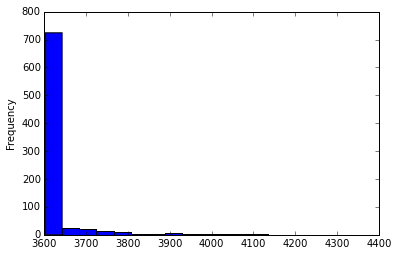

In [117]:
u1["duration"][(u1["duration"] > 3600) & (u1["duration"] < 4500)].plot(kind = 'hist', bins = 18)

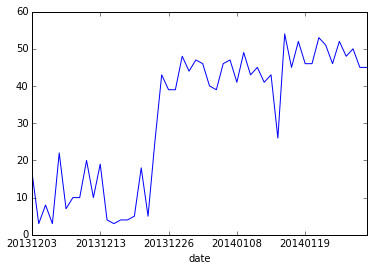

In [118]:
u1.groupby('date').size().plot()

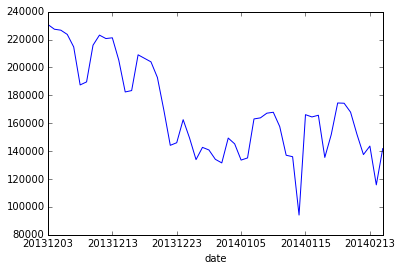

In [119]:
filteredData.groupby('date').size().plot()

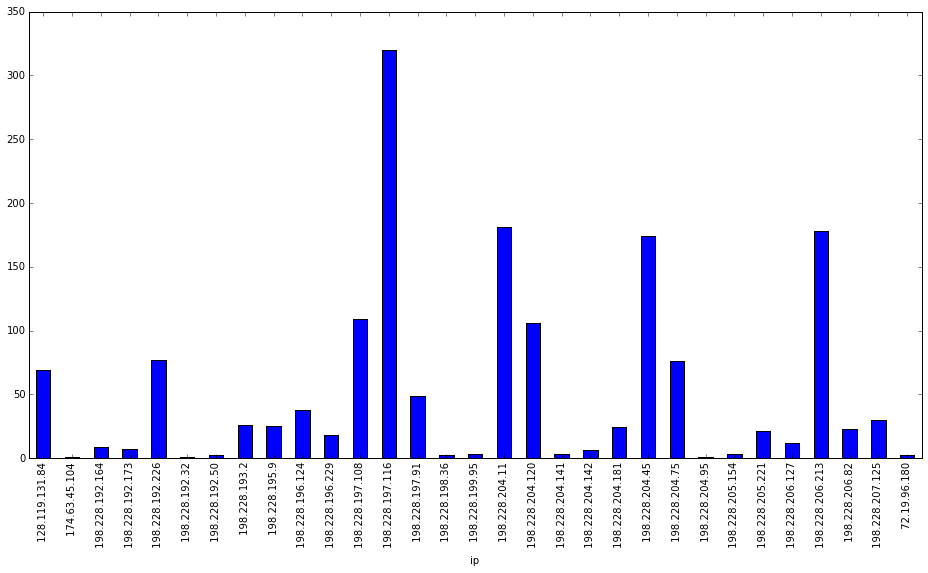

In [120]:
u1.groupby('ip').size().plot(kind = 'bar', figsize = (16,8))